<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Platypus library - deeper exploration of the libraries

**Reference [1]:** https://github.com/Project-Platypus/Platypus<br>
**Reference [2]:** https://platypus.readthedocs.io/en/latest/getting-started.html<br>

<br></font>
</div>

In [1]:
from platypus import NSGAII, Problem, Real
from platypus import NSGAII, NSGAIII, DTLZ2
import matplotlib.pyplot as plt
from platypus.operators import PCX
from matplotlib import rcParams
from platypus import Problem, Permutation, nondominated
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
rcParams['figure.figsize'] = 14, 8
rcParams['font.size'] = 20

# Getting rid of the warning messages
import warnings
warnings.filterwarnings("ignore")

# Bounded, bi-objective and single varaible problems

<div class="alert alert-block alert-info">
<font color=black><br>

- https://github.com/Project-Platypus/Platypus

<br></font>
</div>

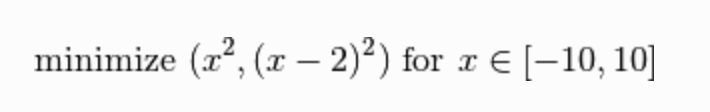

In [2]:
# Create test function
def schaffer(x):
        return [x[0]**2, (x[0]-6)**2]

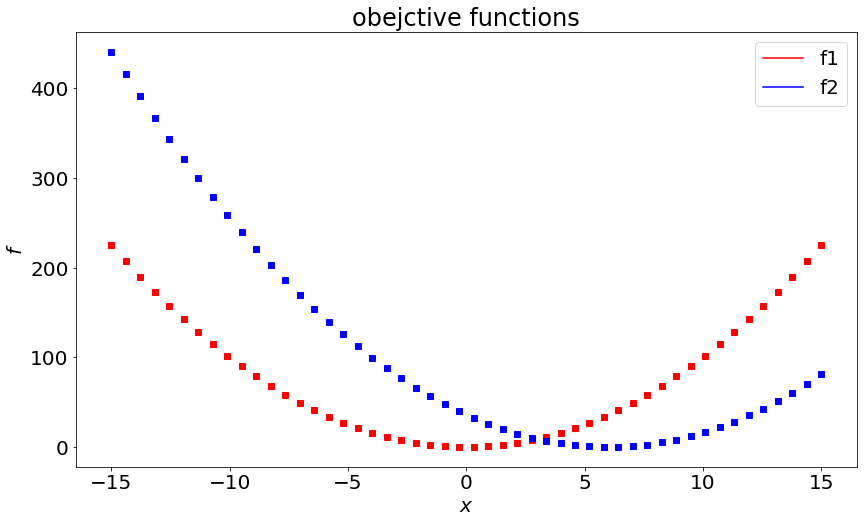

In [3]:
xx = np.linspace(-15,15)
plt.title("obejctive functions")
plt.plot(0, schaffer([0])[0], "r", label = "f1")
plt.plot(0, schaffer([0])[1], "b", label = "f2")
    
for i in xx: 
    plt.plot(i, schaffer([i])[0], "sr")
    plt.plot(i, schaffer([i])[1], "sb")
    
plt.xlabel("$x$")
plt.ylabel("$f$")
plt.legend()
plt.show()

In [4]:
# instantiate the optimization algorithm    

# 1 is the number of decision variables, 2 is the number of objectives
problem = Problem(1, 2)

# The notation problem.types[:] is a shorthand way to assign all decision variables to the same type. 
problem.types[:] = Real(-15, 15)
problem.function = schaffer

# optimize the problem using 10,000 function evaluations
algorithm = NSGAIII(problem, divisions_outer = 34)
algorithm.run(10000)

In [5]:
"""
algorithm has the following methods:
evaluate_all', 
'evaluator', 
'generator', 
'ideal_point', 
'initialize', 
'iterate',
'log_frequency', 
'nfe', 
'population', 
'population_size',
'problem', 
'reference_points',
'result', 
'run',
'selector', 
'step', 
'variator'
"""

"\nalgorithm has the following methods:\nevaluate_all', \n'evaluator', \n'generator', \n'ideal_point', \n'initialize', \n'iterate',\n'log_frequency', \n'nfe', \n'population', \n'population_size',\n'problem', \n'reference_points',\n'result', \n'run',\n'selector', \n'step', \n'variator'\n"

In [6]:
print(dir(algorithm))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__metaclass__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_associate_to_reference_point', '_find_extreme_points', '_find_minimum_distance', '_reference_point_truncate', 'evaluate_all', 'evaluator', 'generator', 'ideal_point', 'initialize', 'iterate', 'log_frequency', 'nfe', 'population', 'population_size', 'problem', 'reference_points', 'result', 'run', 'selector', 'step', 'variator']


In [7]:
# showing in a slightly better way
print("Obj1\t\tObj2")
print(len(algorithm.result))
for solution in algorithm.result:
    print("%0.6f\t%0.6f" % tuple(solution.objectives))

Obj1		Obj2
36
7.465102	10.678296
0.790171	26.123183
5.059274	14.067877
6.986515	11.268095
17.978182	3.097359
12.595192	6.007545
6.495679	11.911732
11.919885	6.489661
8.473737	9.542117
35.990683	0.000001
9.534581	8.480840
16.807317	3.611244
20.945184	2.026094
7.964785	10.098444
5.539168	13.296644
6.020053	12.577098
1.440576	23.037696
26.114430	0.791694
23.032921	1.441770
8.997255	9.002745
14.058329	5.065003
0.000000	36.003489
2.572441	19.325844
10.672351	7.470074
3.604031	16.822889
4.094871	15.811925
2.025260	20.947863
10.090579	7.971773
19.318164	2.575244
4.581356	14.896434
15.804664	4.098568
11.275307	6.980838
14.887702	4.586200
3.099867	17.972141
13.291876	5.542246
2.535675	19.427113


In [8]:
"""
each s instance has the following methods:
constraint_violation',
'constraints', 
'crowding_distance', 
'evaluate', 
'evaluated', 
'feasible', 
'normalized_objectives',
'objectives', 
'problem', 
'rank', 
'variables'
"""

"\neach s instance has the following methods:\nconstraint_violation',\n'constraints', \n'crowding_distance', \n'evaluate', \n'evaluated', \n'feasible', \n'normalized_objectives',\n'objectives', \n'problem', \n'rank', \n'variables'\n"

In [9]:
# Getting the value of the design variable
print("Obj1\t\t\tObj2\t\t\tDV")
print(len(algorithm.result))
for solution in algorithm.result:
    #print("%0.6f\t%0.6f\t%0.6f" % (solution.objectives[0] , solution.variables[0]))
    print(solution.objectives[0], "\t", solution.objectives[1], "\t", solution.variables[0])

Obj1			Obj2			DV
36
7.465101574692634 	 10.678295893813331 	 2.732233806739942
0.790171134604036 	 26.12318264754823 	 0.8889157072546507
5.059274438849951 	 14.067877305793038 	 2.2492830944214095
6.986515372359304 	 11.268094642131581 	 2.643201727518977
17.978181767527133 	 3.097358518252685 	 4.240068604106204
12.595192095960238 	 6.007545274161382 	 3.548970568483238
6.495679398625679 	 11.91173208304691 	 2.5486622762982307
11.919885127424523 	 6.489661155677384 	 3.4525186643122616
8.473736744892093 	 9.542116523888009 	 2.9109683517503404
35.99068288381467 	 6.029158975649329e-07 	 5.999223523408231
9.534581336317675 	 8.480840466740887 	 3.087811739131399
16.80731696820359 	 3.611243512882819 	 4.099672787943398
20.94518372241878 	 2.0260936350156173 	 4.57659084061693
7.964785257332784 	 10.09844389816142 	 2.8221951132642804
5.539167587792367 	 13.29664410560153 	 2.353543623515903
6.020052871401361 	 12.577097627713679 	 2.45357960364064
1.4405759819117627 	 23.037696360277

In [10]:
feasible_solutions = [s for s in algorithm.result if s.feasible]
infeasible_solutions = [s for s in algorithm.result if not s.feasible]
print(len(feasible_solutions))
print(len(infeasible_solutions))
nondominated_solutions = nondominated(algorithm.result)
print(len(nondominated_solutions))

36
0
36


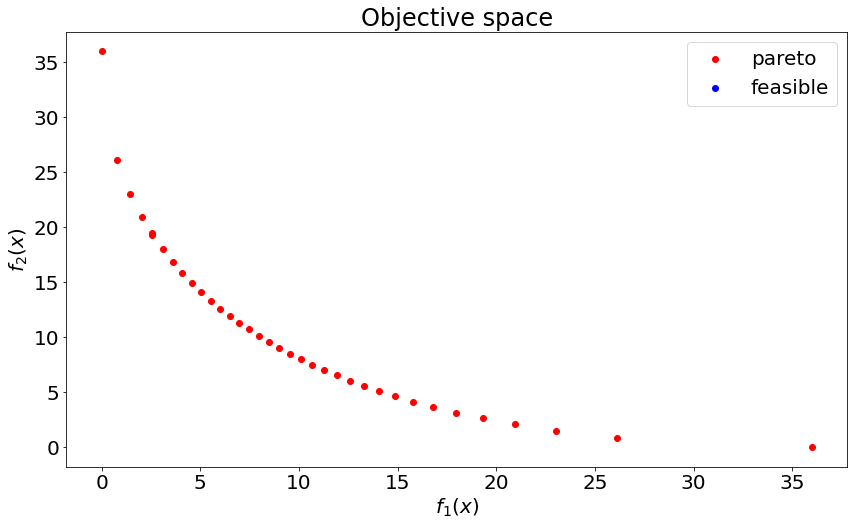

In [11]:
plt.title("Objective space")
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result], c = "r", label = "pareto")

plt.scatter([s.objectives[0] for s in infeasible_solutions],
            [s.objectives[1] for s in infeasible_solutions], c = "b", label = "feasible")

#plt.xlim([0, 1.1])
#plt.ylim([0, 1.1])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.legend()
plt.show()

# Bounded, constraint, bi-variable and bi-objective problem

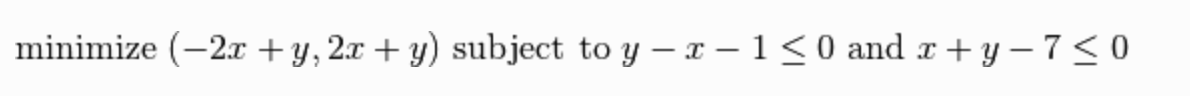

In [12]:
def belegundu(vars):
    x = vars[0]
    y = vars[1]
    return [-2*x + y, 2*x + y], [-x + y - 1, x + y - 7]

In [13]:
"""
plotting the two funtions
"""

'\nplotting the two funtions\n'

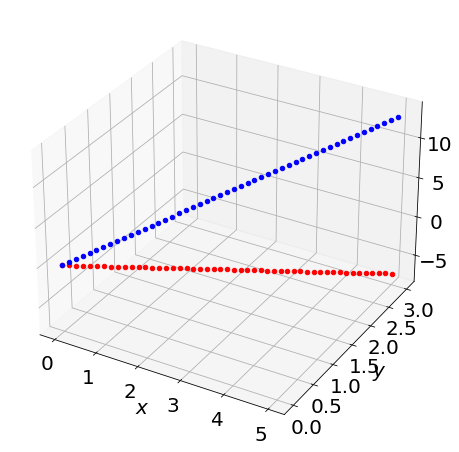

In [14]:
xx = np.linspace(0,5)
yy = np.linspace(0,3)
xy = list(zip(xx,yy))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in xy:
    #print(np.array(i))
    vars= np.array(i)
    rest = belegundu(vars)
    #print(rest[0])
    f1 = rest[0][0]
    f2 = rest[0][1]    

    ax.scatter(vars[0], vars[1], f1, c = "r")
    ax.scatter(vars[0], vars[1], f2, c = "b")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [15]:

# (2, 2, 2) means that have we have 2 decision variables, 2 objectives, and 2 constraints, respectively.
problem = Problem(2, 2, 2)

# type and DVs bounds! also called feasability criteria
problem.types[:] = [Real(0, 5), Real(0, 3)]

# The constraint feasibility criteria is specified as the string 
# "<=0", meaning a solution is feasible if the constraint values are less than or equal to zero.
problem.constraints[:] = "<=0"
problem.function = belegundu

algorithm = NSGAII(problem)
algorithm.run(10000)

In [16]:
algorithm.result[0].variables

[1.576230257427369e-10, 2.3686396553115473e-11]

In [17]:
feasible_solutions = [s for s in algorithm.result if s.feasible]
infeasible_solutions = [s for s in algorithm.result if not s.feasible]

In [18]:
print(len(feasible_solutions))
print(len(infeasible_solutions))

100
0


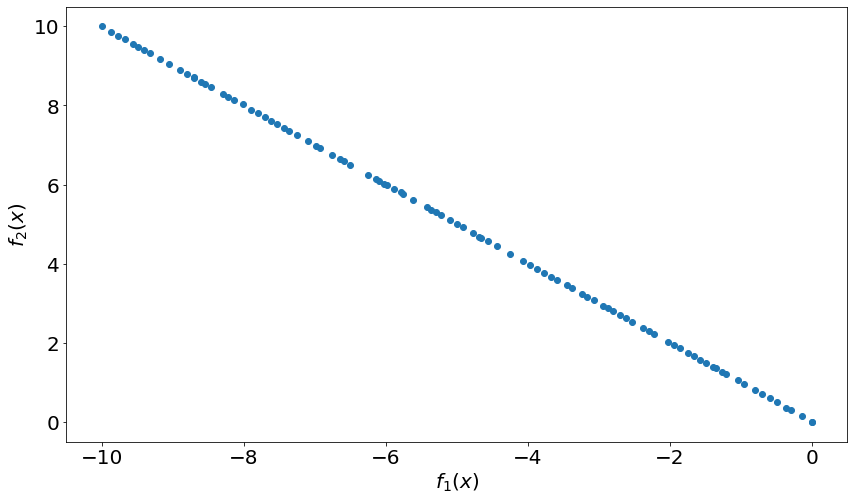

In [19]:
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])

plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()

In [20]:
# Getting the value of the design variable
print("Obj1\t\t\tObj2\t\t\tDV#1\t\t\tDV#2")
print(len(algorithm.result))
for solution in algorithm.result:
    #print("%0.6f\t%0.6f\t%0.6f" % (solution.objectives[0] , solution.variables[0]))
    print(solution.objectives[0], "\t", solution.objectives[1], "\t", solution.variables[0], "\t", solution.variables[1])

Obj1			Obj2			DV#1			DV#2
100
-2.9155965493235833e-10 	 3.3893244803858927e-10 	 1.576230257427369e-10 	 2.3686396553115473e-11
-9.999999907969567 	 9.999999912020012 	 4.999999954997395 	 2.025222741677979e-09
-4.250340368906574 	 4.250363375340402 	 2.125175936061744 	 1.150321691455224e-05
-4.4396801382495505 	 4.439680141906286 	 2.219840070038959 	 1.828367768092669e-09
-0.14114011779693592 	 0.1411401180362638 	 0.07057005895829993 	 1.1966395578663317e-10
-9.046538306615568 	 9.047165259030402 	 4.523425891411493 	 0.00031347620741629945
-4.061154948905819 	 4.061154980687548 	 2.030577482398342 	 1.5890865009476743e-08
-9.17668334515857 	 9.176683345163331 	 4.5883416725804755 	 2.3805356914218186e-12
-1.0456014819747057 	 1.045601482415411 	 0.5228007410975292 	 2.2035254279676063e-10
-8.897285583853984 	 8.897295115426926 	 4.448645174820228 	 4.7657864719160745e-06
-8.28803451881585 	 8.288068996697062 	 4.144025878878228 	 1.7238940605966094e-05
-4.777488210446238 	 4.77748

# Checking the constraints

In [21]:
for index, value in enumerate(xy):
    #print(np.array(i))
    vars= np.array(value)
    #print(vars)
    
    output = belegundu(vars)
    #print(rest[0])
    f1 = output[0][0]
    f2 = output[0][1]    
    con1 = output[1][0]
    con2 = output[1][1]
    print("f1:",f1,"f2", f2,"con1", con1,"con2", con2, "con1<0", con1<0, "con2<0", con2<0)


f1: 0.0 f2 0.0 con1 -1.0 con2 -7.0 con1<0 True con2<0 True
f1: -0.14285714285714285 f2 0.2653061224489796 con1 -1.0408163265306123 con2 -6.836734693877551 con1<0 True con2<0 True
f1: -0.2857142857142857 f2 0.5306122448979592 con1 -1.0816326530612246 con2 -6.673469387755102 con1<0 True con2<0 True
f1: -0.4285714285714286 f2 0.7959183673469388 con1 -1.1224489795918369 con2 -6.510204081632653 con1<0 True con2<0 True
f1: -0.5714285714285714 f2 1.0612244897959184 con1 -1.163265306122449 con2 -6.346938775510204 con1<0 True con2<0 True
f1: -0.7142857142857143 f2 1.3265306122448979 con1 -1.2040816326530612 con2 -6.183673469387755 con1<0 True con2<0 True
f1: -0.8571428571428572 f2 1.5918367346938775 con1 -1.2448979591836735 con2 -6.020408163265306 con1<0 True con2<0 True
f1: -1.0 f2 1.8571428571428572 con1 -1.2857142857142858 con2 -5.857142857142858 con1<0 True con2<0 True
f1: -1.1428571428571428 f2 2.122448979591837 con1 -1.3265306122448979 con2 -5.6938775510204085 con1<0 True con2<0 True
f1: 

# Conclusion

<div class="alert alert-block alert-danger">
<font color=black><br>

- This library allows an easy set-up of a multi-objective problem.
- You need to allocate enough time to let it run. If stop earlier you'll have to deal with it.
- Cost can become an issue but the library has a multi-threading (i.e. your laptop) and an MPI implementation (cluster).

<br></font>
</div>